In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import math

torch.manual_seed(42)


In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2.0 * math.pi * torch.rand(train_data_length)  # x ∈ [0, 2π]
train_data[:, 1] = torch.sin(train_data[:, 0])  # y = sin(x)

train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
discriminator = Discriminator()
generator = Generator()

loss_function = nn.BCELoss()
learning_rate = 0.0005
optimizer_discriminator = optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_generator = optim.Adam(generator.parameters(), lr=learning_rate)

num_epochs = 7000
batch_size = 64


In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # === Discriminator ===
        real_samples_labels = torch.ones((batch_size, 1)) * (0.8 + 0.2 * torch.rand((batch_size, 1)))
        latent_space_samples = torch.randn((batch_size, 2)) * 2 + math.pi
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))

        all_samples = torch.cat((real_samples, generated_samples))
        all_labels = torch.cat((real_samples_labels, generated_samples_labels))

        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # === Generator ===
        latent_space_samples = torch.randn((batch_size, 2)) * 2 + math.pi
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

    # === Plot every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | D Loss: {loss_discriminator.item():.4f} | G Loss: {loss_generator.item():.4f}")


Epoch 0 | D Loss: 0.6601 | G Loss: 0.7109
Epoch 1000 | D Loss: 0.6890 | G Loss: 0.7767
Epoch 2000 | D Loss: 0.6851 | G Loss: 0.7922
Epoch 3000 | D Loss: 0.6580 | G Loss: 0.8006
Epoch 4000 | D Loss: 0.6647 | G Loss: 0.7825
Epoch 5000 | D Loss: 0.6103 | G Loss: 1.0227
Epoch 6000 | D Loss: 0.6859 | G Loss: 0.8748


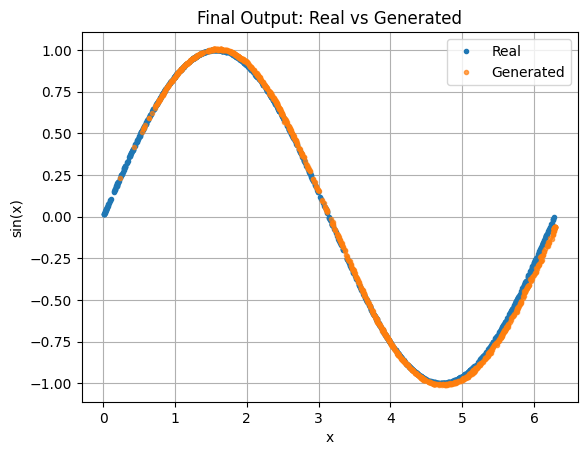

In [ ]:
with torch.no_grad():
    latent = torch.randn(1000, 2) * 2 + math.pi
    generated = generator(latent).detach().numpy()

    plt.plot(train_data[:, 0], train_data[:, 1], ".", label="Real")
    plt.plot(generated[:, 0], generated[:, 1], ".", alpha=0.7, label="Generated")
    plt.xlabel("x")
    plt.ylabel("sin(x)")
    plt.title("Final Output: Real vs Generated")
    plt.legend()
    plt.grid(True)
    plt.show()


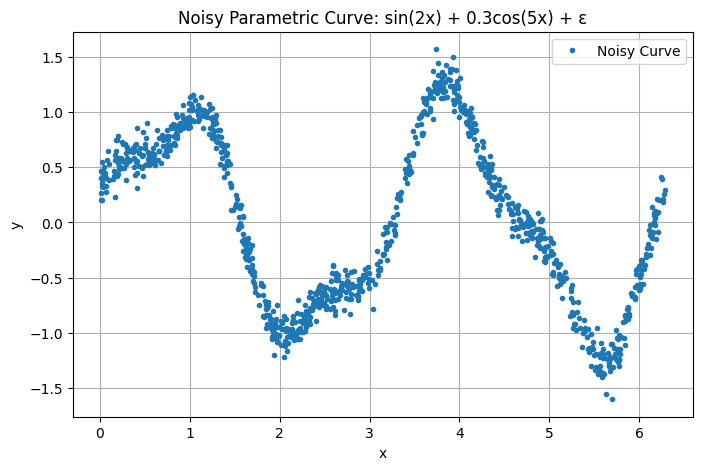

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

torch.manual_seed(42)
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2.0 * math.pi * torch.rand(train_data_length)
epsilon = 0.1 * torch.randn(train_data_length)
train_data[:, 1] = torch.sin(2 * train_data[:, 0]) + 0.3 * torch.cos(5 * train_data[:, 0]) + epsilon

plt.figure(figsize=(8, 5))
plt.plot(train_data[:, 0], train_data[:, 1], '.', label='Noisy Curve')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Noisy Parametric Curve: sin(2x) + 0.3cos(5x) + ε")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# --- Imports ---
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt

# --- Data: Noisy Parametric Curve ---
torch.manual_seed(42)
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2.0 * math.pi * torch.rand(train_data_length)
epsilon = 0.1 * torch.randn(train_data_length)
train_data[:, 1] = torch.sin(2 * train_data[:, 0]) + 0.3 * torch.cos(5 * train_data[:, 0]) + epsilon

train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)


In [ ]:

# --- Discriminator ---
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# --- Generator ---
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.model(x)

# --- Instantiate Models ---
discriminator = Discriminator()
generator = Generator()


In [ ]:

# --- Training Setup ---
num_epochs = 15000
learning_rate = 0.0003
batch_size = 64
loss_function = nn.BCELoss()
optimizer_discriminator = optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_generator = optim.Adam(generator.parameters(), lr=learning_rate)


In [ ]:

# --- Training Loop ---
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # === Train Discriminator ===
        real_samples_labels = torch.ones((batch_size, 1)) * (0.8 + 0.2 * torch.rand((batch_size, 1)))
        latent_space_samples = torch.randn((batch_size, 2)) * 2 * math.pi
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))

        all_samples = torch.cat((real_samples, generated_samples))
        all_labels = torch.cat((real_samples_labels, generated_samples_labels))

        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # === Train Generator ===
        latent_space_samples = torch.randn((batch_size, 2)) * 2 * math.pi
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

    # --- Print loss every 500 epochs ---
    if epoch % 500 == 0:
        print(f"Epoch {epoch} | D Loss: {loss_discriminator.item():.4f} | G Loss: {loss_generator.item():.4f}")


Epoch 0 | D Loss: 0.6058 | G Loss: 0.6954
Epoch 500 | D Loss: 0.6805 | G Loss: 0.7778
Epoch 1000 | D Loss: 0.6794 | G Loss: 0.7835
Epoch 1500 | D Loss: 0.6918 | G Loss: 0.7801
Epoch 2000 | D Loss: 0.6885 | G Loss: 0.8340
Epoch 2500 | D Loss: 0.6724 | G Loss: 0.8238
Epoch 3000 | D Loss: 0.6876 | G Loss: 0.7892
Epoch 3500 | D Loss: 0.6818 | G Loss: 0.7893
Epoch 4000 | D Loss: 0.6743 | G Loss: 0.8249
Epoch 4500 | D Loss: 0.6711 | G Loss: 0.8117
Epoch 5000 | D Loss: 0.6948 | G Loss: 0.7921
Epoch 5500 | D Loss: 0.6924 | G Loss: 0.8233
Epoch 6000 | D Loss: 0.6882 | G Loss: 0.8166
Epoch 6500 | D Loss: 0.6743 | G Loss: 0.8070
Epoch 7000 | D Loss: 0.6690 | G Loss: 0.8288
Epoch 7500 | D Loss: 0.6772 | G Loss: 0.8093
Epoch 8000 | D Loss: 0.6782 | G Loss: 0.8058
Epoch 8500 | D Loss: 0.7030 | G Loss: 0.8422
Epoch 9000 | D Loss: 0.6784 | G Loss: 0.7886
Epoch 9500 | D Loss: 0.6861 | G Loss: 0.7961
Epoch 10000 | D Loss: 0.6690 | G Loss: 0.8077
Epoch 10500 | D Loss: 0.6692 | G Loss: 0.9102
Epoch 11000 

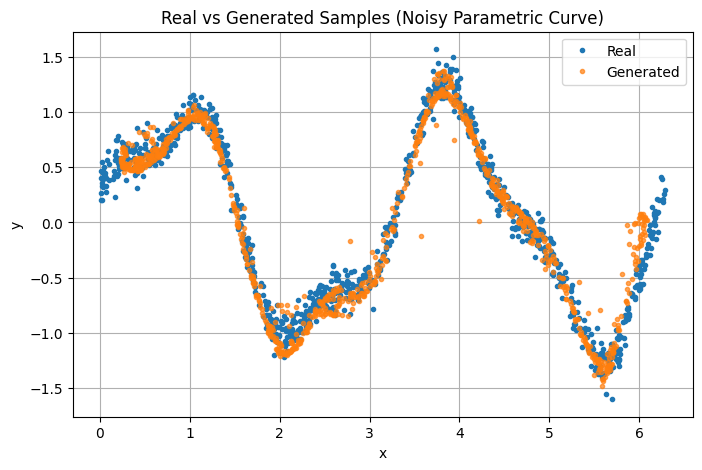

In [ ]:
import numpy as np

# --- Plot Real vs Generated Data ---
with torch.no_grad():
    latent = torch.randn(1000, 2) * 2 * math.pi  # same latent input scale
    generated = generator(latent).detach().numpy()

plt.figure(figsize=(8, 5))
plt.plot(train_data[:, 0], train_data[:, 1], '.', label='Real')
plt.plot(generated[:, 0], generated[:, 1], '.', alpha=0.7, label='Generated')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Real vs Generated Samples (Noisy Parametric Curve)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
!pip install medmnist


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256

In [ ]:
from medmnist import INFO, PathMNIST
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

# Dataset info
info = INFO['pathmnist']
DataClass = getattr(__import__('medmnist', fromlist=[info['python_class']]), info['python_class'])

# Download training set
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

train_ds = DataClass(split='train', transform=transform, download=True)
val_ds = DataClass(split='val', transform=transform, download=True)
test_ds = DataClass(split='test', transform=transform, download=True)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)


100%|██████████| 206M/206M [00:07<00:00, 26.7MB/s]


In [ ]:
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28*3, 512), nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256), nn.LeakyReLU(0.2),
            nn.Linear(256, 1)
        )
    def forward(self, x): return self.model(x)


In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256), nn.ReLU(),
            nn.Linear(256, 512), nn.ReLU(),
            nn.Linear(512, 28*28*3), nn.Tanh()
        )
    def forward(self, z):
        img = self.model(z)
        return img.view(z.size(0), 3, 28, 28)


In [ ]:
import torch

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim=100

# Then initialize your models
discriminator = Discriminator().to(device)
generator = Generator(latent_dim=100).to(device)


In [ ]:


opt_d = optim.Adam(discriminator.parameters(), lr=2e-4)
opt_g = optim.Adam(generator.parameters(), lr=2e-4)
criterion = nn.BCELoss()

num_epochs = 60
for epoch in range(num_epochs):
    for imgs, _ in train_loader:
        real = imgs.to(device)
        bs = real.size(0)
        labels_real = torch.ones(bs,1).to(device)
        labels_fake = torch.zeros(bs,1).to(device)

        # Discriminator step
        noise = torch.randn(bs, latent_dim, device=device)
        fake = generator(noise)
        d_real = discriminator(real)
        d_fake = discriminator(fake.detach())
        loss_d = criterion(d_real, labels_real) + criterion(d_fake, labels_fake)
        opt_d.zero_grad(); loss_d.backward(); opt_d.step()

        # Generator step
        d_fake_for_g = discriminator(fake)
        loss_g = criterion(d_fake_for_g, labels_real)
        opt_g.zero_grad(); loss_g.backward(); opt_g.step()

    if epoch % 2 == 0:
        print(f"Epoch {epoch} | Loss D: {loss_d.item():.4f} | Loss G: {loss_g.item():.4f}")


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


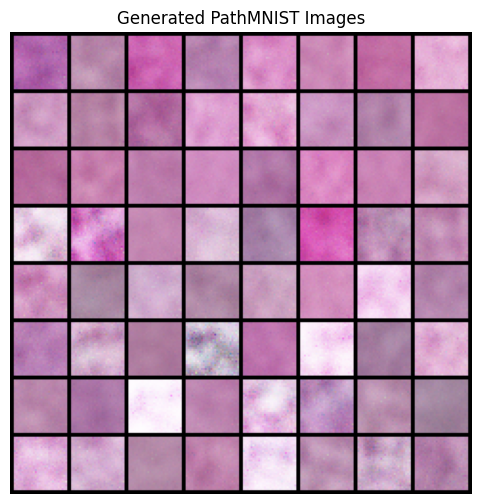

In [ ]:
import matplotlib.pyplot as plt
import torchvision

with torch.no_grad():
    samples = generator(torch.randn(64, latent_dim).to(device)).cpu()

grid = torchvision.utils.make_grid((samples * 0.5 + 0.5), nrow=8)
plt.figure(figsize=(6,6))
plt.imshow(grid.permute(1,2,0))
plt.axis('off')
plt.title("Generated PathMNIST Images")
plt.show()
